<font color='blue'> Привет. Поздравляю с первым сборным проектом. Ниже мои комментарии выделены синим. </font>

<font color='green'> Привет! Спасибо! Ответы выделил зеленым. </font>

In [114]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline


from scipy import stats as st
import numpy as np
import seaborn as sns; sns.set()




# Анализ рынка игр от интернет-магазина

Цель: выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


In [2]:
df = pd.read_csv('/datasets/games.csv', sep=',' , decimal='.')


In [3]:
df.shape

(16715, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [6]:
df['Name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [7]:
len(df['Name'].unique())

11560

In [8]:
#df.columns

In [9]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [10]:
len(df['Genre'].unique())

13

Надо посмотреть, где есть пропущенные значения. В жанрах точно есть

###### Сколько значений пропущено в каждой колонке?

In [11]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                'percent_missing': percent_missing})
missing_value_df.sort_values(by='percent_missing').round(2)

,column_name,percent_missing
Platform,Platform,0.00
NA_sales,NA_sales,0.00
EU_sales,EU_sales,0.00
JP_sales,JP_sales,0.00
Other_sales,Other_sales,0.00
Name,Name,0.01
Genre,Genre,0.01
Year_of_Release,Year_of_Release,1.61
User_Score,User_Score,40.09
Rating,Rating,40.48


In [12]:
np.sort(df['Year_of_Release'].unique())

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

+++<font color='blue'> Здесь бы хотелось увидеть описание того, что мы обнаружили в данных. Какие проблемы, пропуски, несоответствие типов. Должен получиться некоторый план на предобработку. Иначе потом не понятно почему мы делаем те или иные преобразования. В реальных проектах не будет задания и всю предобработку надо спланировать заранее. </font>

<font color='green'> Мне кажется, удобнее начать делать и потом в процессе приводить что нужно. </font>

name, platform, genre, rating — string  
year_of_release — to_datetime  
User_Score — пропуски заполнить нулями чтобы не мешали, при анализе исключить. Перевести в float  
Rating — Много пропущенных значений, восстановить можно разве что добавив из открытых источников данные  


+++<font color='blue'> Ок вот это уже похоже на план. Только его надо вынести выше и выделить в виде выводов к первому шагу, именно там его ожидают увидеть. Здесь его не найти. </font>  
<font color='green'> Ага, перенес! </font>

<font color='red'> Ок </font>

## Шаг 2. Подготовьте данные


+Замените названия столбцов (приведите к нижнему регистру);  
Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;  
+++Обработайте пропуски при необходимости:  
Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;  
Опишите причины, которые могли привести к пропускам;  Большая часть пропусков — это отсутствие рейтинга игр на непопцлярных платформах.
Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;  
Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.


In [13]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

+Замените названия столбцов (приведите к нижнему регистру)

In [14]:
df.columns = map(str.lower, df.columns)

In [15]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

###### Удалим 1,5% пропусков в году

In [16]:
df = df.dropna(how='any', subset=['name', 'genre', 'year_of_release'])

In [18]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                'percent_missing': percent_missing})
missing_value_df.sort_values(by='percent_missing').round(2)

,column_name,percent_missing
name,name,0.00
platform,platform,0.00
year_of_release,year_of_release,0.00
genre,genre,0.00
na_sales,na_sales,0.00
eu_sales,eu_sales,0.00
jp_sales,jp_sales,0.00
other_sales,other_sales,0.00
user_score,user_score,40.17
rating,rating,40.60


In [19]:
df.shape

(16444, 11)

In [20]:
df['year_of_release'] = df['year_of_release'].astype('int')


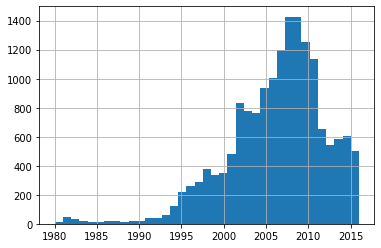

In [21]:
df['year_of_release'].hist(bins = len(df['year_of_release'].unique()))

До 1995 года можно удалить записи — их немного. 

In [23]:
df.query('year_of_release < 1995').count()

name               486
platform           486
year_of_release    486
genre              486
na_sales           486
eu_sales           486
jp_sales           486
other_sales        486
critic_score         4
user_score           4
rating               5
dtype: int64

In [24]:
df.groupby('year_of_release')['critic_score'].sum()

year_of_release
1980        0.0
1981        0.0
1982        0.0
1983        0.0
1984        0.0
1985       59.0
1986        0.0
1987        0.0
1988       64.0
1989        0.0
1990        0.0
1991        0.0
1992       85.0
1993        0.0
1994       69.0
1995        0.0
1996      719.0
1997     1450.0
1998     2291.0
1999     2955.0
2000     9917.0
2001    23281.0
2002    43292.0
2003    41056.0
2004    38930.0
2005    45077.0
2006    41750.0
2007    45797.0
2008    47122.0
2009    43978.0
2010    33741.0
2011    34346.0
2012    23428.0
2013    19459.0
2014    18548.0
2015    16396.0
2016    16972.0
Name: critic_score, dtype: float64

In [25]:
df.groupby('platform')['critic_score'].sum()

platform
2600        0.0
3DO         0.0
3DS     11148.0
DC       1223.0
DS      45120.0
GB          0.0
GBA     28944.0
GC      30416.0
GEN         0.0
GG          0.0
N64         0.0
NES         0.0
NG          0.0
PC      53073.0
PCFX        0.0
PS      14031.0
PS2     87611.0
PS3     56657.0
PS4     18167.0
PSP     30796.0
PSV      8417.0
SAT         0.0
SCD         0.0
SNES        0.0
TG16        0.0
WS          0.0
Wii     35658.0
WiiU     6366.0
X360    61405.0
XB      49358.0
XOne    12392.0
Name: critic_score, dtype: float64

+++Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;  
Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [27]:
df.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [28]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

##### Исправим TBD

TBD — to be determined, встречается в 'user_score', видимо в данном случае должно быть равно NaN

In [29]:
def change_parametr(raw):
    if raw == 'tbd':
        return np.nan
    return raw
    
df['user_score'] = df['user_score'].apply(change_parametr)

In [30]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

##### Переведем user score в float

In [31]:
df['user_score'] = df['user_score'].astype('float')

<font color='blue'> Все графики должны сопровождаться текстовыми комментариями. Иначе не понятно, зачем мы вывели эти гистограммы? Что мы хотели увидеть? Что увидели? </font>  
<font color='green'> Ок! Просто убрал. </font>

##### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [34]:
df['all_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

<font color='blue'> Целевой параметр рассчитан верно, можно переходить к анализу. </font>  
<font color='green'> Ок) </font>

## Шаг 3. Проведите исследовательский анализ данных


##### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

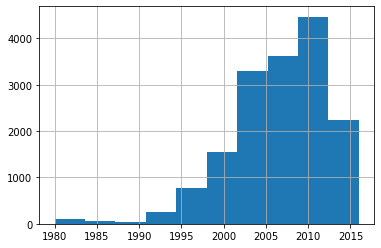

In [35]:
df['year_of_release'].hist()

Период до 1995 года содержит лишь 0.3% игр. Можно исключить 

+<font color='blue'> Ок, верно. </font>

##### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?


In [107]:
platform_sort = df.groupby(['platform', 'year_of_release']).agg('count')
platform_sort.reset_index(inplace=True)


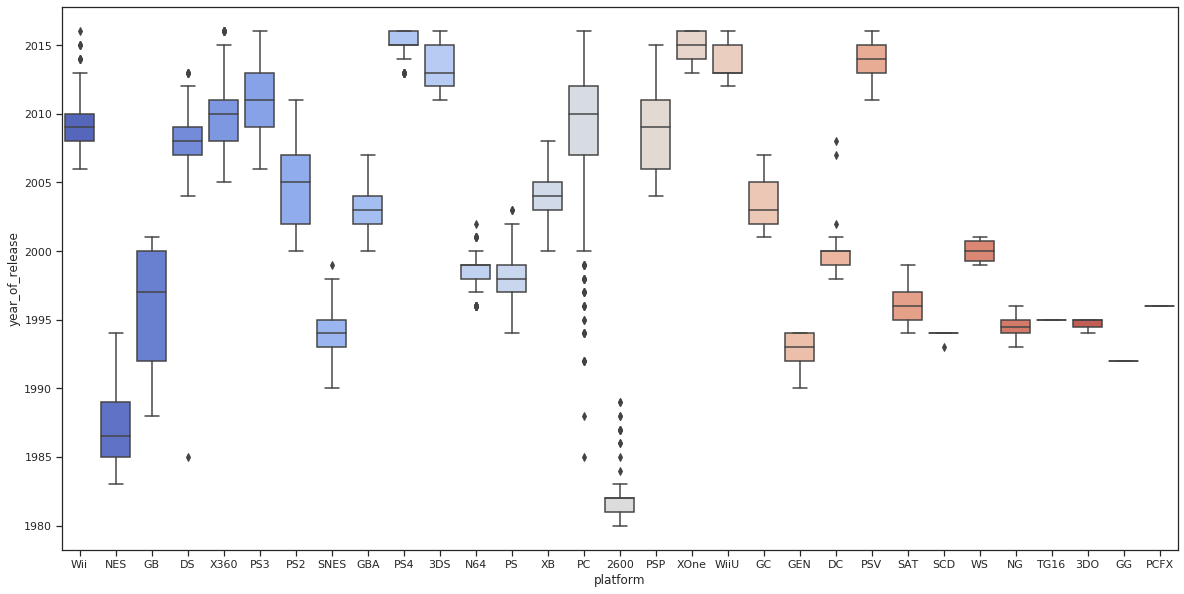

In [108]:
plt.figure(figsize=(20,10))

sns.boxplot(
    x="platform", y="year_of_release", data=df, palette="coolwarm");


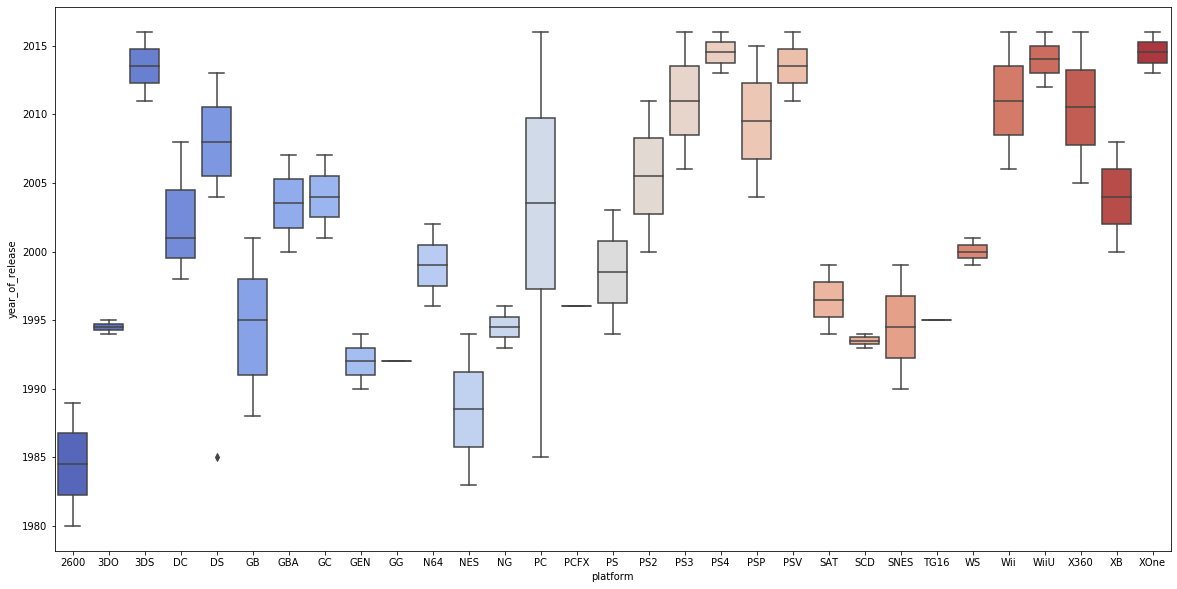

In [38]:
plt.figure(figsize=(20,10))

sns.boxplot(
    x="platform", y="year_of_release", data=platform_sort, palette="coolwarm");


In [39]:
platform_mean = df.groupby(['platform', 'year_of_release']).agg('mean')
platform_mean.reset_index(inplace=True)


In [40]:
platform_mean.groupby('platform')['year_of_release'].count().mean()

7.67741935483871

+<font color='blue'> Да, все верно рассчитано. </font>

##### Средний срок жизни платформы — 7.7 лет

In [41]:
sum_money = df.groupby('platform')['all_sales'].sum().sort_values(ascending=False)

In [42]:
sum_money = sum_money.to_frame()
sum_money.reset_index(inplace=True)


In [43]:
sum_money

,platform,all_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


In [44]:
top_platforms = sum_money.query('all_sales > 100')['platform'].unique()

In [45]:
top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP',
       '3DS', 'PC', 'GB', 'XB', 'NES', 'N64', 'SNES', 'GC', 'XOne']

In [46]:
top_platforms.sort()
top_platforms

['3DS',
 'DS',
 'GB',
 'GBA',
 'GC',
 'N64',
 'NES',
 'PC',
 'PS',
 'PS2',
 'PS3',
 'PS4',
 'PSP',
 'SNES',
 'Wii',
 'X360',
 'XB',
 'XOne']

In [47]:
df_top = df.query('platform in @top_platforms')

Text(0.5, 1.0, 'Суммарные продажи топ платформ')

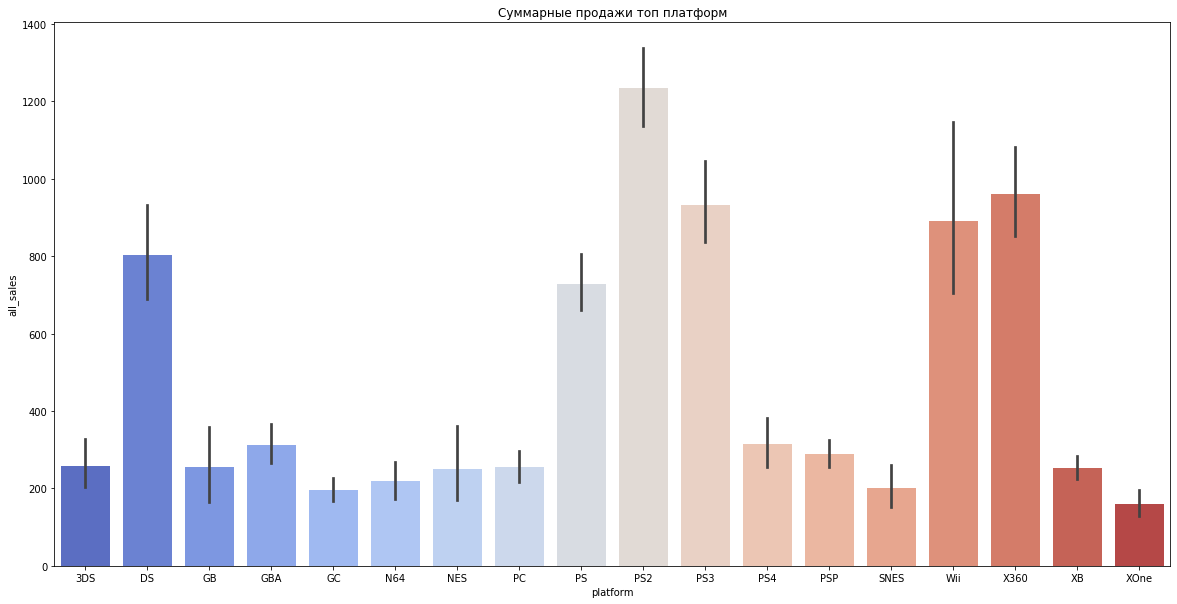

In [48]:
plt.figure(figsize=(20,10))

sns.barplot(
    x="platform", 
    y="all_sales", 
    data=df_top, 
    palette="coolwarm", 
    estimator=sum, 
    order=top_platforms).set_title("Суммарные продажи топ платформ")


Text(0.5, 1.0, 'Количество игр на Топ платформ по годам')

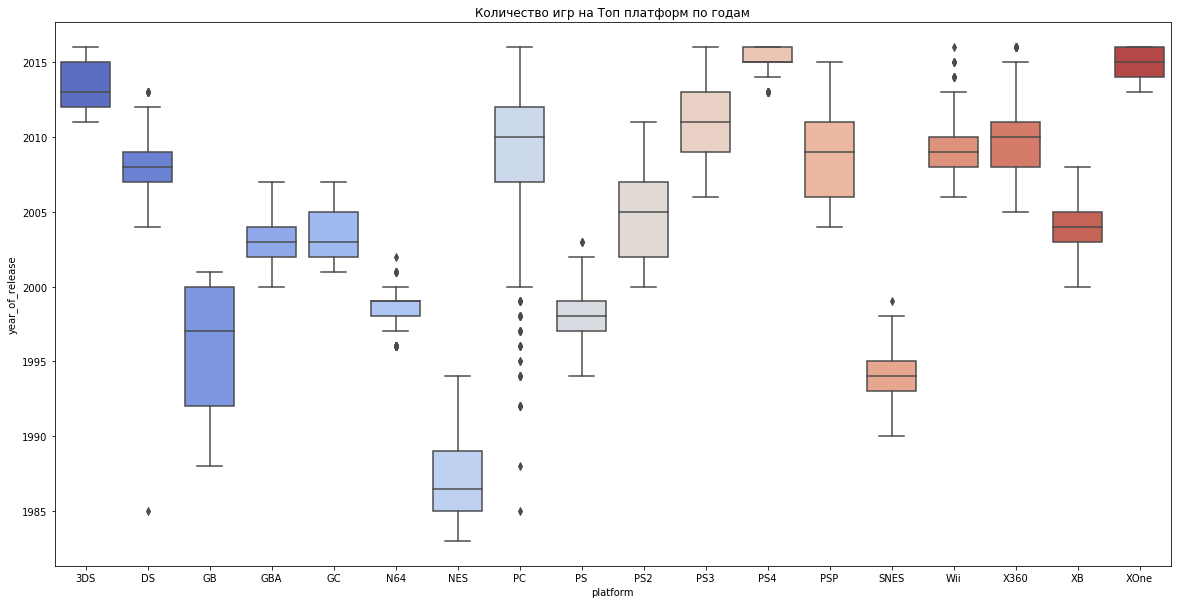

In [49]:
plt.figure(figsize=(20,10))

sns.boxplot(
    x="platform", 
    y="year_of_release", 
    data=df_top, 
    palette="coolwarm", 
    order=top_platforms).set_title("Количество игр на Топ платформ по годам")



Попробуем построить график суммы продаж каждой платформы по годам

Text(0.5, 1.0, 'Суммарные продажи топ платформ')

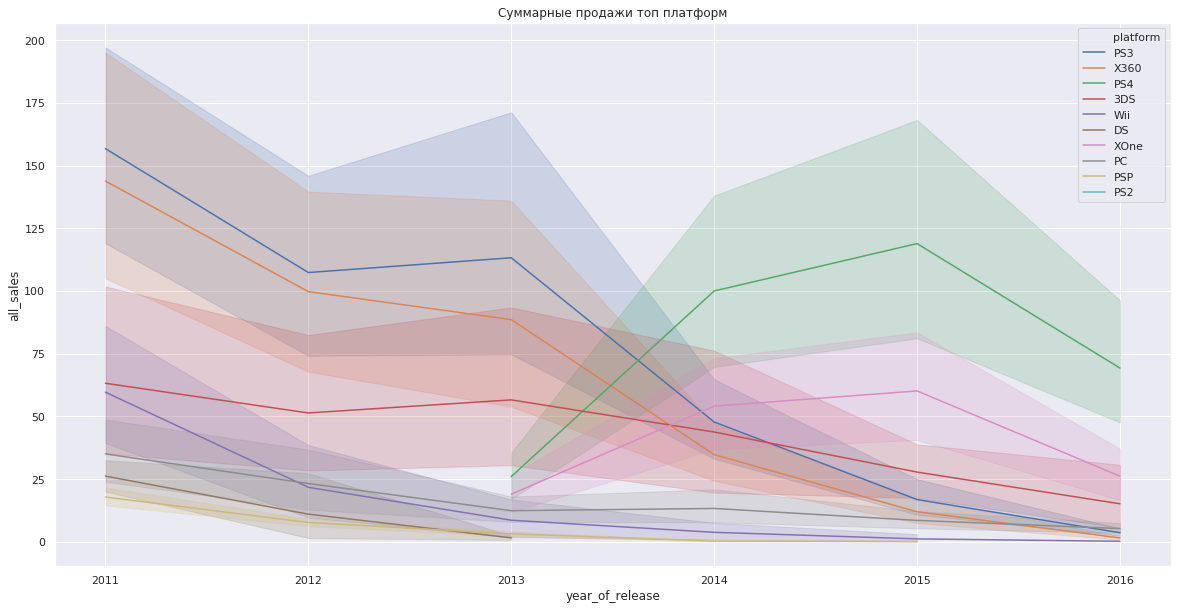

In [128]:


plt.figure(figsize=(20,10))

(sns.lineplot(
    x="year_of_release", 
    y="all_sales", 
    hue='platform', 
    data=df_top.query('year_of_release > 2010'), 
#     palette="coolwarm",
#     style="event",
    markers=True, 
    dashes=False, 
    estimator=sum).set_title("Суммарные продажи топ платформ"))

<font color='red'> Ок Так намного нагляднее </font>

In [51]:
df_2005 = df.query('year_of_release > 2004')

In [52]:
sum_money_2005 = df_2005.groupby('platform')['all_sales'].sum().sort_values(ascending=False)

In [53]:
sum_money_2005 = sum_money_2005.to_frame()
sum_money_2005.reset_index(inplace=True)


In [54]:
top_platforms_2005 = sum_money_2005.query('all_sales > 100')['platform'].unique()

In [55]:
df_2005['platform'].unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS4', '3DS', 'PC', 'PSP', 'XOne',
       'WiiU', 'PS2', 'GBA', 'PSV', 'XB', 'GC', 'DC'], dtype=object)

In [56]:
df_2005 = df_2005.query('platform in @top_platforms_2005')

In [57]:
top_platf_10 = df_2005['platform'].unique()

In [58]:
top_platf_10.sort()
top_platf_10

array(['3DS', 'DS', 'PC', 'PS2', 'PS3', 'PS4', 'PSP', 'Wii', 'X360',
       'XOne'], dtype=object)

In [59]:
test10plat = ['3DS', 'DS', 'PC', 'PS2', 'PS3', 'PS4', 'PSP', 'Wii', 'X360',
       'XOne']

Text(0.5, 1.0, 'Суммарные продажи топ-10 платформ с 2005 года')

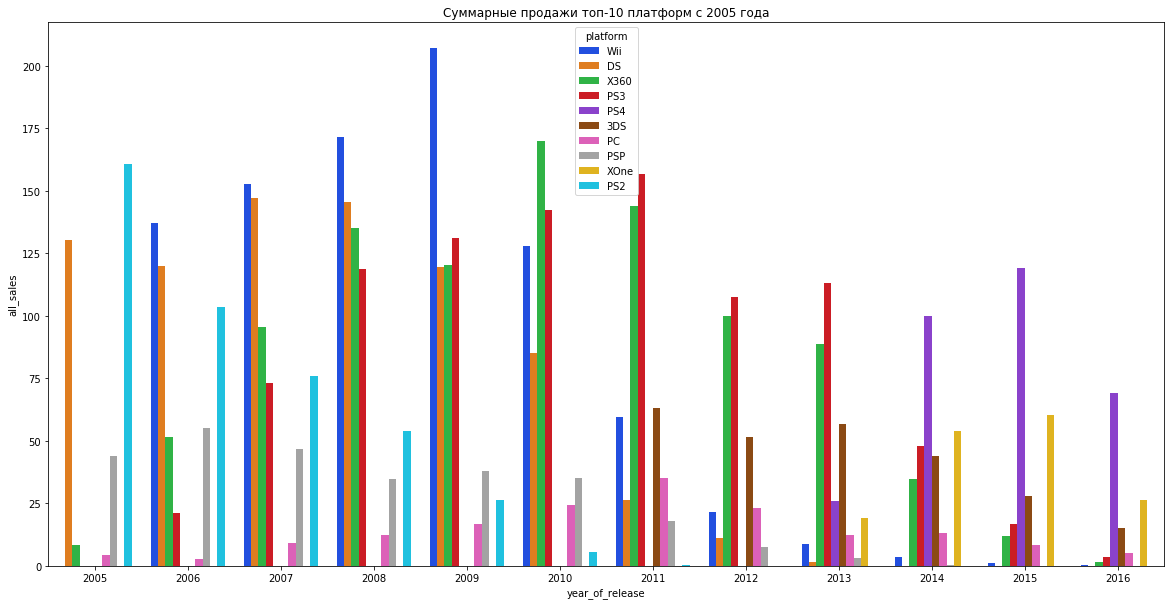

In [60]:
plt.figure(figsize=(20,10))

(sns.barplot(
    x="year_of_release", 
    y="all_sales", 
    hue='platform', 
    data=df_2005, 
    palette="bright", 
    estimator=sum, ci=None)
    .set_title("Суммарные продажи топ-10 платформ с 2005 года"))

Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
Последние годы лидируют: XOne, PS4. Явно эти платформы падают, будет новое поколение. Оставим также для анализа PC, 3DS      

<font color='blue'> Ок, актуальные платформы указаны верно. </font>'

Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.


In [61]:
top4platforms=['3DS', 'PC', 'PS4', 'XOne']

In [62]:
df_top4 = df_2005.query('platform in @top4platforms')

In [63]:
df_top4

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
40,Mario Kart 7,3DS,2011,Racing,5.03,4.02,2.69,0.91,85.0,8.2,E,12.65
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
...,...,...,...,...,...,...,...,...,...,...,...,...
16690,Pony Friends 2,PC,2009,Simulation,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.0,7.6,M,0.01
16696,Breach,PC,2011,Shooter,0.01,0.00,0.00,0.00,61.0,5.8,T,0.01
16702,STORM: Frontline Nation,PC,2011,Strategy,0.00,0.01,0.00,0.00,60.0,7.2,E10+,0.01


(0, 2)

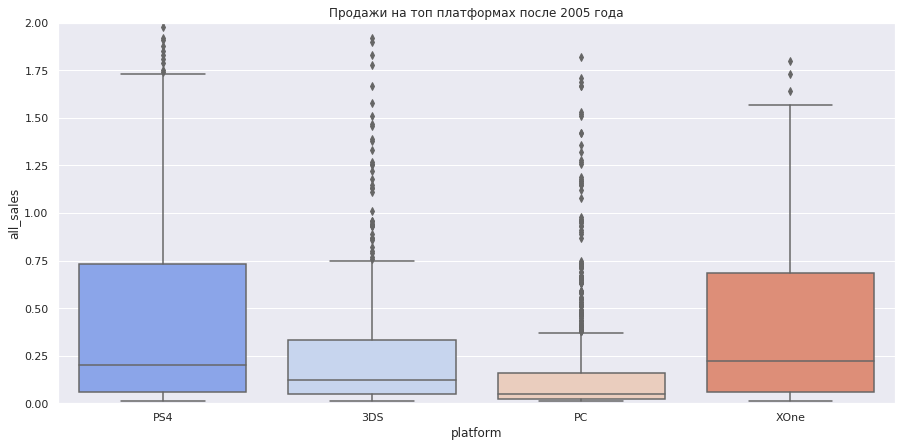

In [133]:
plt.figure(figsize=(15,7))

ax = sns.boxplot(
    x="platform", 
    y="all_sales",
    
    data=df_top4, palette="coolwarm").set_title("Продажи на топ платформах после 2005 года")

plt.ylim(0, 2)


# ax.set(ylim=(0, 2))

# ax2 = sns.swarmplot(
#     alpha=0.3,
#     x="platform", 
#     y="all_sales",
    
#     data=df_top4, palette="coolwarm").set_title("Продажи на топ платформах после 2005 года")



<font color='blue'> Здесь лучше было ограничить вертикальную ось интервалом 0-2. А так большой график, но не слишком информативный, видны в основном выбросы. </font>  

<font color='green'> Да, получилось отл </font>

<font color='red'> Ок </font>

Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.

In [65]:
df_top4.groupby('platform')['all_sales'].agg(['mean', 'median', 'count', 'max', 'min']).round(2)

,mean,median,count,max,min
platform,,,,,
3DS,0.50,0.12,512,14.60,0.01
PC,0.21,0.05,813,8.01,0.01
PS4,0.80,0.20,392,14.63,0.01
XOne,0.65,0.22,247,7.39,0.01


##### Основной объем продаж схож на PS4 и XOne. Самые дорогие (хитовые) игры — PS4 и 3DS. Игры на PC дешевле.
Средняя объем прибыли по играм по платформам:  
PS4 — 0.8     
xONE — 0.65   
3DS — 0.50  
PC — 0.21  


In [66]:
ps4 = df.query('platform == "PS4"')

In [67]:
ps4

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16500,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,NaN,0.01
16503,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16526,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01
16530,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.01


In [68]:
ps4

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16500,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,NaN,0.01
16503,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16526,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01
16530,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.01


Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [69]:
ps4_critical = ps4[['critic_score', 'user_score', 'all_sales']]
ps4_critical

,critic_score,user_score,all_sales
31,NaN,NaN,14.63
42,97.0,8.3,12.62
77,82.0,4.3,8.58
87,NaN,NaN,7.98
92,83.0,5.7,7.66
...,...,...,...
16500,69.0,7.5,0.01
16503,NaN,NaN,0.01
16526,61.0,7.9,0.01
16530,51.0,5.5,0.01


/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


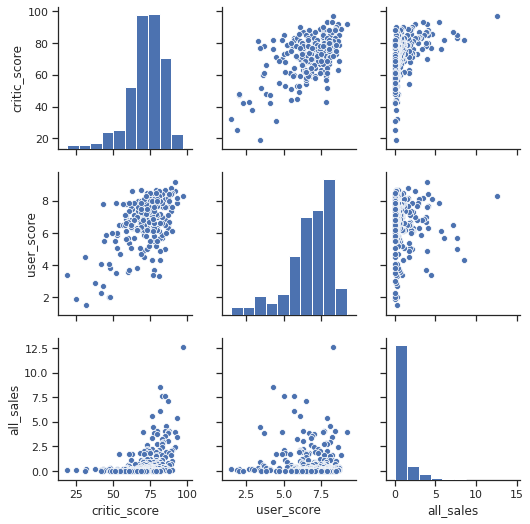

In [70]:
sns.set(style="ticks")
sns.pairplot(ps4_critical)


In [71]:
ps4_critical['all_sales'].corr(ps4_critical['user_score'])


-0.031957110204556424

In [72]:
ps4_critical['all_sales'].corr(ps4_critical['critic_score'])


0.406567902061781

Оценки критиков умеренно влияют на продажи. Одна игра со 100 отзывом критиков была продана с сильным отрывом.   
При этом игры со средними продажами часто имеют более низкую оценку пользователей, чем у критиков и чем более дешевые игры. 
Однако сто процентно оцененные критиками хиты также оцениваются пользователями.

Оценки умеренно сильно коррелируют с продажами (прямая корреляция — выше оценка — лучше продажи)  
Оценки пользователей корреляции не имеют. 


<font color='blue'> выводы не совсем корректны. Корреляция 0.4 - это слабая/умеренная корреляция, а это говорит о том, что влияние оценки критиков на продажи так же слабое. (Сильная корреляция и соответственно сильное влияние начинается где-то с коэффициента 0.7) </font>

<font color='green'> Поправил! </font>

<font color='red'> Ок Теперь все статистически верно</font>

Соотнесите выводы с продажами игр на других платформах.
Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

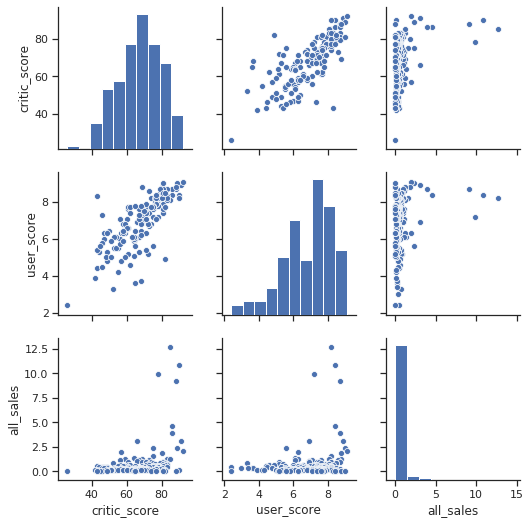

In [73]:
top4platforms=['3DS', 'PC', 'PS4', 'XOne']

nintendo = df.query('platform == "3DS"')
nintendo_critical = nintendo[['critic_score', 'user_score', 'all_sales']]

sns.pairplot(nintendo_critical)



In [74]:
nintendo_critical['all_sales'].corr(nintendo_critical['critic_score'])

0.34873973059848346

In [75]:
nintendo_critical['all_sales'].corr(nintendo_critical['user_score'])


0.22207843643390884

У Нинтендо совершенно другая корреляция. У критиков чуть слабее, у пользователей наблюдается положительная. Scatterplot показывает схожую ситуацию юзеров с критиками.

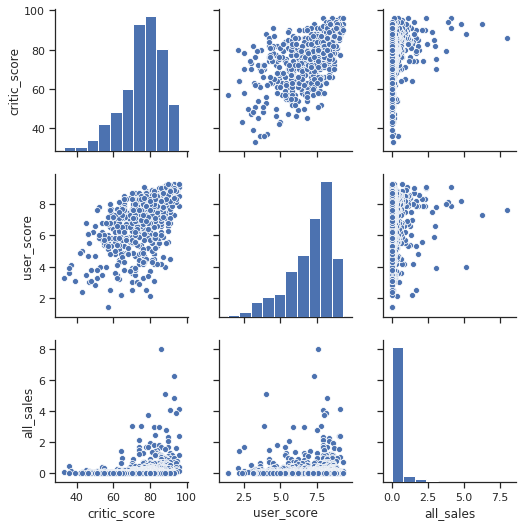

In [76]:
top4platforms=['3DS', 'PC', 'PS4', 'XOne']

PC = df.query('platform == "PC"')
PC_critical = PC[['critic_score', 'user_score', 'all_sales']]

sns.pairplot(PC_critical)

In [77]:
PC_critical['all_sales'].corr(PC_critical['critic_score'])

0.2573947184009851

In [78]:
PC_critical['all_sales'].corr(PC_critical['user_score'])

0.012904741611451193

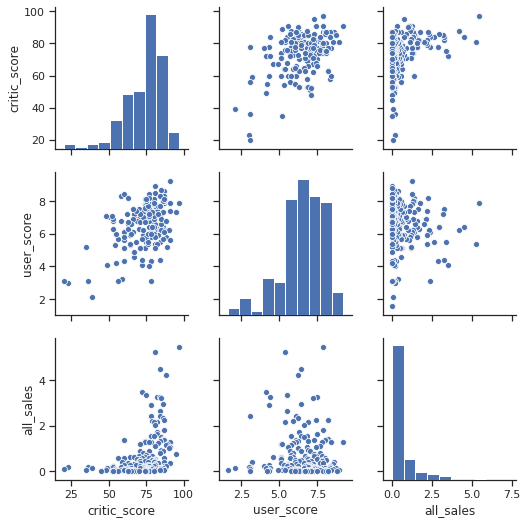

In [79]:
top4platforms=['3DS', 'PC', 'PS4', 'XOne']

XOne = df.query('platform == "XOne"')
XOne_critical = XOne[['critic_score', 'user_score', 'all_sales']]

sns.pairplot(XOne_critical)

In [80]:
XOne_critical['all_sales'].corr(XOne_critical['critic_score'])

0.41699832800840175

In [81]:
XOne_critical['all_sales'].corr(XOne_critical['user_score'])

-0.06892505328279412

У xOne ситуация похожа на PS4.

##### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?


In [82]:
genre_sales = df_2005.groupby('genre')['all_sales'].sum().sort_values(ascending=False)

genre_sales = genre_sales.to_frame()
genre_sales.reset_index(inplace=True)
genre_sales

,genre,all_sales
0,Action,1128.48
1,Sports,823.74
2,Shooter,731.50
3,Misc,582.34
4,Role-Playing,526.57
5,Racing,333.21
6,Platform,266.53
7,Simulation,266.23
8,Fighting,195.15
9,Adventure,140.14


Text(0.5, 1.0, 'Суммарные продажи по жанрам с 2005 года')

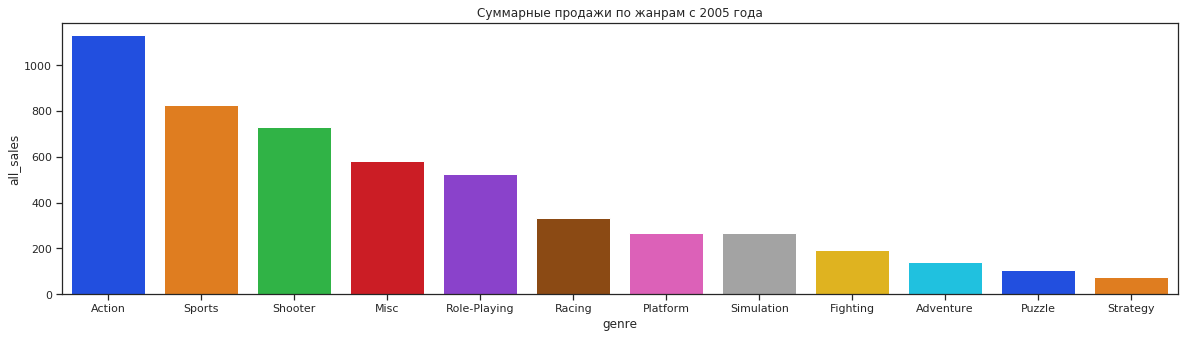

In [83]:
plt.figure(figsize=(20,5))

(sns.barplot(
    x="genre", 
    y="all_sales", 
    data=genre_sales, 
    palette="bright", 
    estimator=sum, ci=None)
    .set_title("Суммарные продажи по жанрам с 2005 года"))

Явно видны топ — action, sports, shooter и худшие продажи — Fighting, adventure, puzzle, strategy

+<font color='blue'> Ок, жанры выделены верно. </font>

## Шаг 4. Составьте портрет пользователя каждого региона


Определите для пользователя каждого региона (NA, EU, JP):  
* +++Самые популярные платформы (топ-5). Опишите различия в долях продаж.  
* +++Самые популярные жанры (топ-5). Поясните разницу.  
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?  


In [84]:
# Почему так не работает?
# continent_list = ['na_sales','eu_sales','jp_sales']
# for name in continent_list:
#     name = df_2005.groupby('platform')[name].sum().sort_values(ascending=False)

# .sort_values(ascending=False)
NA_sales = df_2005.groupby('platform')['na_sales'].sum()
EU_sales = df_2005.groupby('platform')['eu_sales'].sum()
JP_sales = df_2005.groupby('platform')['jp_sales'].sum()

# print('Топ продаж по платформам в Северной Америке:', NA_sales)
# print()
# print('Топ продаж по платформам в Европе:', EU_sales)
# print()
# print('Топ продаж по платформам в Японии:', JP_sales)


NA_sales = NA_sales.to_frame()
NA_sales.reset_index(inplace=True)

EU_sales = EU_sales.to_frame()
EU_sales.reset_index(inplace=True)


JP_sales = JP_sales.to_frame()
JP_sales.reset_index(inplace=True)

top_sales_region = pd.concat([NA_sales, EU_sales['eu_sales'], JP_sales['jp_sales']], axis=1)
top_sales_region.head(5)

,platform,na_sales,eu_sales,jp_sales
0,3DS,82.65,61.27,100.62
1,DS,371.98,184.48,171.35
2,PC,45.84,103.01,0.00
3,PS2,200.49,87.14,50.98
4,PS3,390.13,327.21,79.41


In [85]:
top_sales_region_reshape = pd.melt(top_sales_region, id_vars=['platform'], value_vars=['na_sales', 'eu_sales', 'jp_sales'])


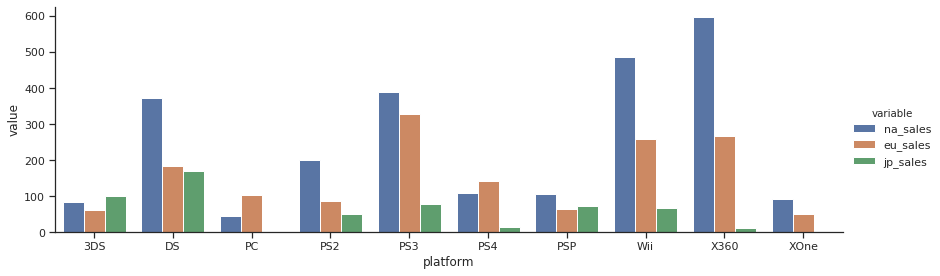

In [86]:
sns.catplot(x='platform', 
            y='value', 
            hue='variable', 
            data=top_sales_region_reshape, 
            kind='bar',
            height=4, aspect=3)


# (sns.barplot(
#     alpha=0.3,
#     x="platform", 
#     y="na_sales", 
#     data=df_2005, 
#     palette="bright", 
#     estimator=sum, ci=None)
#     .set_title("Суммарные продажи по жанрам с 2005 года"))

# (sns.barplot(
#     alpha=0.3,
#     x="platform", 
#     y="eu_sales", 
#     data=df_2005, 
#     palette="bright", 
#     estimator=sum, ci=None)
#     .set_title("Суммарные продажи по жанрам с 2005 года"))

После долгих мучений я разобрался с sns.catplot & pd.melt и как вывести в удобный график.

* Самые популярные жанры (топ-5). Поясните разницу.  


In [87]:
df_2005

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,NaN,NaN,E,0.01
16705,15 Days,PC,2009,Adventure,0.00,0.01,0.00,0.00,63.0,5.8,NaN,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [88]:
genres_by_sales = df_2005.groupby('genre')['na_sales','eu_sales', 'jp_sales'].sum()
genres_by_sales.reset_index(inplace=True)
na_sales_genres = genres_by_sales.sort_values(by=['na_sales'], ascending=False)
na_sales_genres

eu_sales_genres = genres_by_sales.sort_values(by=['eu_sales'], ascending=False)
jp_sales_genres = genres_by_sales.sort_values(by=['jp_sales'], ascending=False)


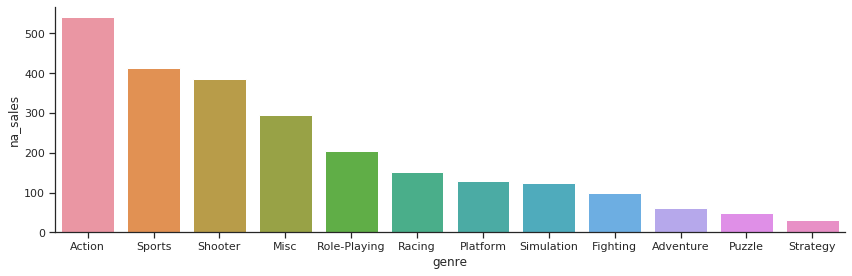

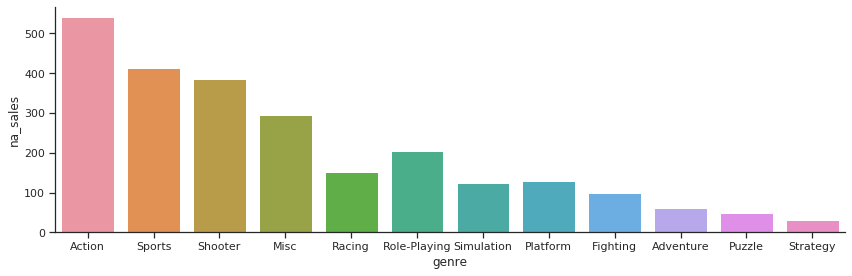

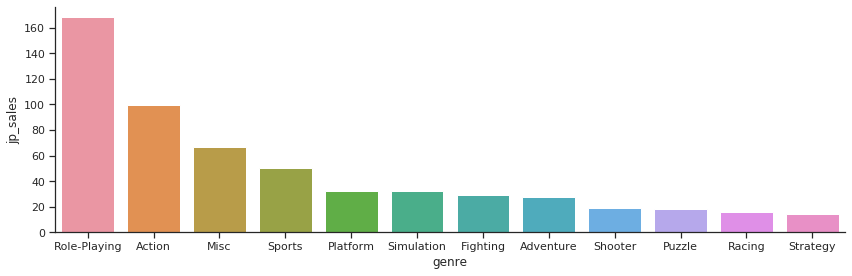

In [89]:
sns.catplot(x='genre', 
            y='na_sales', 
            data=na_sales_genres, 
            kind='bar',
            height=4, aspect=3,
           ci=None,
           )

sns.catplot(x='genre', 
            y='na_sales', 
            data=eu_sales_genres, 
            kind='bar',
            height=4, aspect=3,
           ci=None,
           )

sns.catplot(x='genre', 
            y='jp_sales', 
            data=jp_sales_genres, 
            kind='bar',
            height=4, aspect=3,
           ci=None,
           )



Жанры в Европе ии Северной Америке совпадают, лишь пятый меняется местами — racing/role playing. У японцев Role playing выходит на первое место сдвигая Action, а шутеры вообще уходят в конец списка

In [90]:
rating_by_sales = df_2005.groupby('rating')['na_sales','eu_sales', 'jp_sales'].sum()


In [91]:
rating_by_sales

,na_sales,eu_sales,jp_sales
rating,,,
E,825.97,486.87,137.98
E10+,316.96,167.77,35.44
EC,1.44,0.09,0.00
M,589.54,405.55,43.77
RP,0.00,0.03,0.00
T,454.90,247.65,84.33


In [135]:
rating_by_sales.reset_index(inplace=True)

In [136]:
rating_by_sales_reshape = pd.melt(rating_by_sales, id_vars=['rating'], value_vars=['na_sales', 'eu_sales', 'jp_sales'])

In [148]:
rating_by_sales_reshape = rating_by_sales_reshape.query('value > 2')
rating_by_sales_reshape

,rating,variable,value
0,E,na_sales,825.97
1,E10+,na_sales,316.96
3,M,na_sales,589.54
5,T,na_sales,454.90
6,E,eu_sales,486.87
7,E10+,eu_sales,167.77
9,M,eu_sales,405.55
11,T,eu_sales,247.65
12,E,jp_sales,137.98
13,E10+,jp_sales,35.44


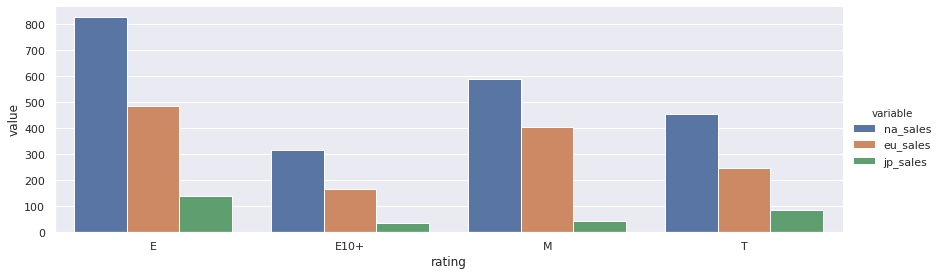

In [149]:
sns.catplot(x='rating', 
            y='value', 
            hue='variable', 
            data=rating_by_sales_reshape, 
            kind='bar',
            height=4, aspect=3)

Text(0.5, 1.0, 'Суммарные продажи топ платформ')

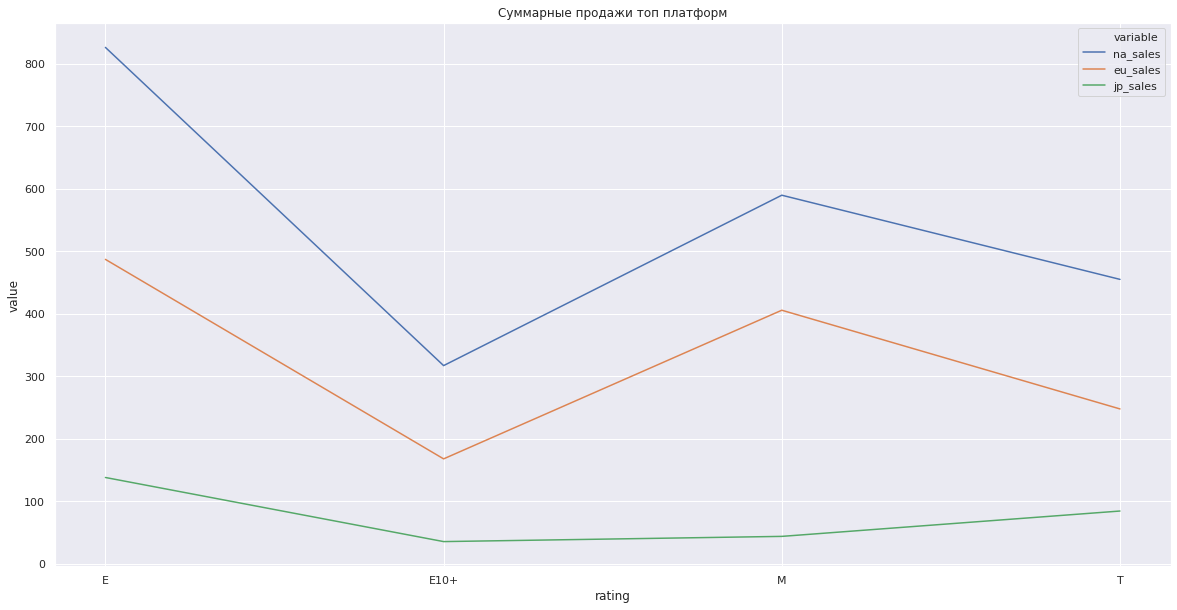

In [150]:
plt.figure(figsize=(20,10))

(sns.lineplot(
    x="rating", 
    y="value", 
    hue='variable', 
    data=rating_by_sales_reshape, 
#     palette="coolwarm",
#     style="event",
    markers=True, 
    dashes=False, 
    estimator=sum).set_title("Суммарные продажи топ платформ"))

+++<font color='blue'> Рейтинг ERSB - это и есть рейтинг который  у нас в таблице. ERSB - это обозначение(название) самого рейтинга (шкалы), а не конкретный показатель. Т.е надо было проанализировать распределение рейтингов в региолнах . </font>  

* Максимальные продажи во всех регионах — рейтинг Everyone во всех регионах.   
* В Европе и США второй по популярности рейтинг — Mature, затем Teen и E10+  
* В Японии второй по популярности рейтинг — Teen, затем примерно одинаково M & E10+


<font color='red'> Ок </font>

## Шаг 5. Проверьте гипотезы


* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.  
Задайте самостоятельно пороговое значение alpha.
  
Поясните:
* Как вы сформулировали нулевую и альтернативную гипотезы;
* Какой критерий применили для проверки гипотез и почему.


In [95]:
Xbox_one_PC_list = ['PC', 'XOne']
Xbox_one_PC = (df_2005.query('platform in @Xbox_one_PC_list')
                         .groupby('platform')
                         ['user_score']
                         .mean()
)



In [96]:
Xbox_one_PC

platform
PC      6.884938
XOne    6.521429
Name: user_score, dtype: float64

##### Нулевая гипотеза — средние пользовательские рейтинги платформ Xbox One и PC равны.  
Альтернативная гипотеза — средние пользовательские рейтинги платформ Xbox One и PC разные.

In [97]:
xbox_platform = df_2005.query('platform == "XOne"')
PC_platform = df_2005.query('platform == "PC"')

In [151]:
len(xbox_platform)

247

In [157]:
len(PC_platform)

559

In [160]:
xbox_platform.dropna(inplace=True)
PC_platform.dropna(inplace=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [161]:
len(xbox_platform)

159

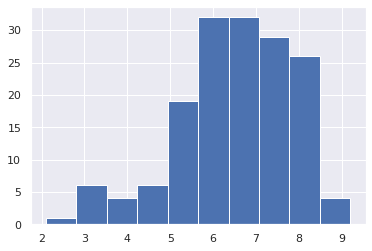

In [162]:
xbox_platform['user_score'].hist()

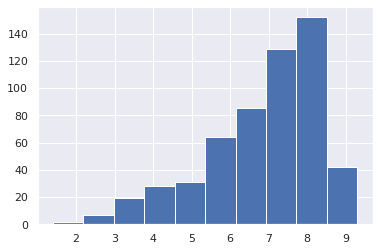

In [163]:
PC_platform['user_score'].hist()

In [164]:
alpha = 0.05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    xbox_platform['user_score'], 
    PC_platform['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 0.004263699818008891
Отвергаем нулевую гипотезу


In [170]:
action_genre = df_2005.query('genre == "Action"').dropna()
sports_genre = df_2005.query('genre == "Sports"').dropna()

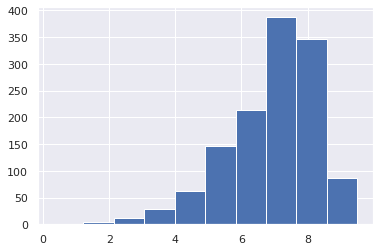

In [166]:
action_genre['user_score'].hist(bins=10)

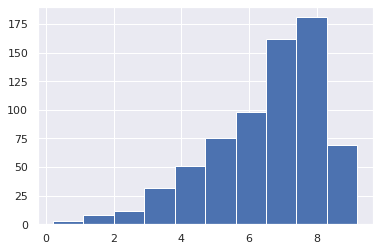

In [167]:
sports_genre['user_score'].hist()

In [171]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    action_genre['user_score'], 
    sports_genre['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 6.218086120690444e-06
Отвергаем нулевую гипотезу


In [169]:
print('Средняя по жанру Action', action_genre.mean().round(2), 'Средняя по жанру Спорт', sports_genre.mean().round(2))

Средняя по жанру Action year_of_release    2010.45
na_sales              0.24
eu_sales              0.16
jp_sales              0.04
other_sales           0.06
critic_score         66.46
user_score            6.91
all_sales             0.51
dtype: float64 Средняя по жанру Спорт year_of_release    2009.38
na_sales              0.33
eu_sales              0.20
jp_sales              0.04
other_sales           0.08
critic_score         70.04
user_score            6.47
all_sales             0.65
dtype: float64


##### Средние значения датасета пользовательских рейтингов: 
xBox — 6.88, PC — 6.52. Разница — 0.36

Средняя по жанру Action 6.91 Средняя по жанру Спорт 6.47. Разница — 0.44

Согласно t-тесту разниица в рейтингах и жанрах действительно есть.

Формулировал гипотезу H0 согласно уроку о том, что две генеральные совокупности равны.
Критерий проверки гипотез — статичстический тест p-value

+++<font color='blue'> У тебя в списках с оценками есть nan, поэтому p-value и не посчиталось.Убери nan и пересчитай гипотезы. </font>

<font color='red'> Ок Теперь гипотезы сформулировыаны и проверены верно </font>

## Шаг 6. Напишите общий вывод


Период до 1995 года содержит лишь 0.3% игр. Можно исключить 

Заменил на NaN _TBD — to be determined, встречается в 'user_score'

Средний срок жизни платформы — 7.7 лет

Последние годы лидируют: XOne, PS4. Явно эти платформы падают, будет новое поколение. Оставим также для анализа PC, 3DS 

Основной объем продаж схож на PS4 и XOne. Самые дорогие (хитовые) игры — PS4 и 3DS. Игры на PC дешевле.
Средняя объем прибыли по играм по платформам (млн долларов США):  
PS4 — 0.8     
xONE — 0.65   
3DS — 0.50  
PC — 0.21  


Оценки критиков сильно влияют на продажи. Одна игра со 100 отзывом критиков была продана с сильным отрывом.   
При этом игры со средними продажами часто имеют более низкую оценку пользователей, чем у критиков и чем более дешевые игры. 
Однако сто процентно оцененные критиками хиты также оцениваются пользователями.

Оценки критиков сильно коррелируют с продажами (прямая корреляция — выше оценка — лучше продажи)  
Оценки пользователей корреляции не имеют. 

У Нинтендо совершенно другая корреляция. У критиков чуть слабее, у пользователей наблюдается положительная. Scatterplot показывает схожую ситуацию юзеров с критиками.

У xOne ситуация похожа на PS4.


Жанры с высокими проожажами — action, sports, shooter и худшие продажи — Fighting, adventure, puzzle, strategy

Самая популярная платформа с 2005 года в Штатах — X360, в Европе — PS3, в Японии — DS

Популярные жанры в Европе и Северной Америке совпадают, лишь пятый меняется местами — racing/role playing. У японцев Role playing выходит на первое место сдвигая Action, а шутеры вообще уходят в конец списка

* Максимальные продажи во всех регионах — рейтинг Everyone во всех регионах.   
* В Европе и США второй по популярности рейтинг — Mature, затем Teen и E10+  
* В Японии второй по популярности рейтинг — Teen, затем примерно одинаково M & E10+


##### Средние значения датасетапользовательских рейтингов: 
xBox — 6.88, PC — 6.52. Разница — 0.36

Средняя по жанру Action 6.91 Средняя по жанру Спорт 6.47. Разница — 0.44

Согласно t-тесту разниица в рейтингах и жанрах действительно есть.

<font color='blue'> Проект не плохо начат, но есть что доработать. Постарайся исправиль по замечаниям. Удачи. </font>  
<font color='green'> Спасибо! </font>

<font color='red'> Проект отлично доработан, молодец. Удачи в следующих модулях. </font>